In [1]:
import sys, os

sys.path.append(os.path.abspath("../"))

In [2]:
import pandas as pd
from datetime import datetime, timezone, timedelta

In [13]:
from src.models.iv import HestonSmallTimeIV
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import least_squares
model = HestonSmallTimeIV((-0.4, 0.1, 0.5), None, None)

In [14]:
data = pd.read_csv('../data/eth_options_iv.csv')
data.head()

,hr_time,expired_date,spot,strikes,call_ivs,put_ivs,call_amounts,put_amounts,expiry,mark_call_prices,mark_put_prices,otm_ivs,otm_amounts
0,2023-09-16 01:00:00+00:00,2023-10-27T08:00:00.000Z,1642.50,"[900, 1000, 1100, 1200, 1300, 1400, 1500, 1600...","[0, 72.18, 64.33, 56.97, 49.42, 42.14, 35.3, 3...","[79.64, 72.18, 64.33, 56.97, 49.42, 42.14, 35....","[0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 169.0, 496.0...","[71.0, 114.0, 48.0, 1.0, 828.0, 422.0, 80.0, 6...",1698393600,"[0, 646.4328959999999, 547.72706, 450.00664, 3...","[1.314416, 2.299864, 3.613192, 5.5840239999999...","[79.64, 72.18, 64.33, 56.97, 49.42, 42.14, 35....","[71.0, 114.0, 48.0, 1.0, 828.0, 422.0, 80.0, 6..."
1,2023-09-16 02:00:00+00:00,2023-10-27T08:00:00.000Z,1643.92,"[900, 1000, 1100, 1200, 1300, 1400, 1500, 1600...","[0, 71.76, 64.33, 57.03, 48.81, 42.12, 35.21, ...","[78.51, 71.76, 64.33, 57.03, 48.81, 42.12, 35....","[0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 169.0, 316.0...","[43.0, 156.0, 46.0, 1.0, 337.0, 412.0, 248.0, ...",1698393600,"[0, 647.1079119999999, 548.7980399999999, 451....","[1.150219, 2.136173, 3.4508039999999998, 5.587...","[78.51, 71.76, 64.33, 57.03, 48.81, 42.12, 35....","[43.0, 156.0, 46.0, 1.0, 337.0, 412.0, 248.0, ..."
2,2023-09-16 03:00:00+00:00,2023-10-27T08:00:00.000Z,1647.08,"[900, 1000, 1100, 1200, 1300, 1400, 1500, 1600...","[0, 71.91, 64.64, 57.53, 49.21, 42.09, 35.46, ...","[78.94, 71.9, 64.64, 57.53, 49.21, 42.11, 35.4...","[0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 168.0, 854.0...","[43.0, 40.0, 48.0, 2.0, 368.0, 387.0, 205.0, 8...",1698393600,"[0, 650.945776, 552.447402, 454.79192, 357.440...","[1.152984, 2.141542, 3.4589519999999996, 5.600...","[78.94, 71.9, 64.64, 57.53, 49.21, 42.11, 35.4...","[43.0, 40.0, 48.0, 2.0, 368.0, 387.0, 205.0, 8..."
3,2023-09-16 04:00:00+00:00,2023-10-27T08:00:00.000Z,1642.34,"[900, 1000, 1100, 1200, 1300, 1400, 1500, 1600...","[0, 72.0, 64.49, 57.15, 48.86, 41.65, 35.09, 3...","[78.67, 72.0, 64.49, 57.15, 48.86, 41.65, 35.0...","[0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 169.0, 235.0...","[43.0, 40.0, 48.0, 2.0, 1.0, 528.0, 254.0, 97....",1698393600,"[0, 646.130935, 547.6103350000001, 449.9107400...","[1.149372, 2.298744, 3.612422, 5.5826639999999...","[78.67, 72.0, 64.49, 57.15, 48.86, 41.65, 35.0...","[43.0, 40.0, 48.0, 2.0, 1.0, 528.0, 254.0, 97...."
4,2023-09-16 05:00:00+00:00,2023-10-27T08:00:00.000Z,1639.75,"[900, 1000, 1100, 1200, 1300, 1400, 1500, 1600...","[0, 71.78, 64.35, 57.02, 48.65, 41.82, 35.05, ...","[78.57, 71.82, 64.35, 57.01, 48.66, 41.82, 35....","[0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 170.0, 235.0...","[43.0, 40.0, 48.0, 2.0, 1.0, 547.0, 277.0, 117...",1698393600,"[0, 644.2391359999999, 545.8319359999999, 448....","[1.1480629999999998, 2.1321169999999996, 3.608...","[78.57, 71.82, 64.35, 57.01, 48.66, 41.82, 35....","[43.0, 40.0, 48.0, 2.0, 1.0, 547.0, 277.0, 117..."


In [15]:
from src.utls.dataprocess import datatype_trans

data = datatype_trans(data, time_list=["hr_time", "expired_date"], data_list=["strikes", "call_ivs", "put_ivs", "otm_ivs", "call_amounts", "put_amounts"])
data['TtE'] = data['expired_date'] - data['hr_time'] 

data.head()

,hr_time,expired_date,spot,strikes,call_ivs,put_ivs,call_amounts,put_amounts,expiry,mark_call_prices,mark_put_prices,otm_ivs,otm_amounts,TtE
0,2023-09-16 01:00:00+00:00,2023-10-27 08:00:00+00:00,1642.50,"[900, 1000, 1100, 1200, 1300, 1400, 1500, 1600...","[0, 72.18, 64.33, 56.97, 49.42, 42.14, 35.3, 3...","[79.64, 72.18, 64.33, 56.97, 49.42, 42.14, 35....","[0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 169.0, 496.0...","[71.0, 114.0, 48.0, 1.0, 828.0, 422.0, 80.0, 6...",1698393600,"[0, 646.4328959999999, 547.72706, 450.00664, 3...","[1.314416, 2.299864, 3.613192, 5.5840239999999...","[79.64, 72.18, 64.33, 56.97, 49.42, 42.14, 35....","[71.0, 114.0, 48.0, 1.0, 828.0, 422.0, 80.0, 6...",41 days 07:00:00
1,2023-09-16 02:00:00+00:00,2023-10-27 08:00:00+00:00,1643.92,"[900, 1000, 1100, 1200, 1300, 1400, 1500, 1600...","[0, 71.76, 64.33, 57.03, 48.81, 42.12, 35.21, ...","[78.51, 71.76, 64.33, 57.03, 48.81, 42.12, 35....","[0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 169.0, 316.0...","[43.0, 156.0, 46.0, 1.0, 337.0, 412.0, 248.0, ...",1698393600,"[0, 647.1079119999999, 548.7980399999999, 451....","[1.150219, 2.136173, 3.4508039999999998, 5.587...","[78.51, 71.76, 64.33, 57.03, 48.81, 42.12, 35....","[43.0, 156.0, 46.0, 1.0, 337.0, 412.0, 248.0, ...",41 days 06:00:00
2,2023-09-16 03:00:00+00:00,2023-10-27 08:00:00+00:00,1647.08,"[900, 1000, 1100, 1200, 1300, 1400, 1500, 1600...","[0, 71.91, 64.64, 57.53, 49.21, 42.09, 35.46, ...","[78.94, 71.9, 64.64, 57.53, 49.21, 42.11, 35.4...","[0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 168.0, 854.0...","[43.0, 40.0, 48.0, 2.0, 368.0, 387.0, 205.0, 8...",1698393600,"[0, 650.945776, 552.447402, 454.79192, 357.440...","[1.152984, 2.141542, 3.4589519999999996, 5.600...","[78.94, 71.9, 64.64, 57.53, 49.21, 42.11, 35.4...","[43.0, 40.0, 48.0, 2.0, 368.0, 387.0, 205.0, 8...",41 days 05:00:00
3,2023-09-16 04:00:00+00:00,2023-10-27 08:00:00+00:00,1642.34,"[900, 1000, 1100, 1200, 1300, 1400, 1500, 1600...","[0, 72.0, 64.49, 57.15, 48.86, 41.65, 35.09, 3...","[78.67, 72.0, 64.49, 57.15, 48.86, 41.65, 35.0...","[0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 169.0, 235.0...","[43.0, 40.0, 48.0, 2.0, 1.0, 528.0, 254.0, 97....",1698393600,"[0, 646.130935, 547.6103350000001, 449.9107400...","[1.149372, 2.298744, 3.612422, 5.5826639999999...","[78.67, 72.0, 64.49, 57.15, 48.86, 41.65, 35.0...","[43.0, 40.0, 48.0, 2.0, 1.0, 528.0, 254.0, 97....",41 days 04:00:00
4,2023-09-16 05:00:00+00:00,2023-10-27 08:00:00+00:00,1639.75,"[900, 1000, 1100, 1200, 1300, 1400, 1500, 1600...","[0, 71.78, 64.35, 57.02, 48.65, 41.82, 35.05, ...","[78.57, 71.82, 64.35, 57.01, 48.66, 41.82, 35....","[0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 170.0, 235.0...","[43.0, 40.0, 48.0, 2.0, 1.0, 547.0, 277.0, 117...",1698393600,"[0, 644.2391359999999, 545.8319359999999, 448....","[1.1480629999999998, 2.1321169999999996, 3.608...","[78.57, 71.82, 64.35, 57.01, 48.66, 41.82, 35....","[43.0, 40.0, 48.0, 2.0, 1.0, 547.0, 277.0, 117...",41 days 03:00:00


### TtE = 1 hour

In [16]:
data_short = data[data['TtE'] == pd.Timedelta(hours=1)].reset_index()
data_short.head()

,index,hr_time,expired_date,spot,strikes,call_ivs,put_ivs,call_amounts,put_amounts,expiry,mark_call_prices,mark_put_prices,otm_ivs,otm_amounts,TtE
0,986,2023-10-06 07:00:00+00:00,2023-10-06 08:00:00+00:00,1622.04,"[900, 1000, 1100, 1200, 1250, 1300, 1350, 1400...","[0, 107.9, 92.17, 90.86, 90.62, 90.62, 90.62, ...","[109.95, 107.9, 92.17, 90.86, 90.62, 90.62, 90...","[0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1....","[310.0, 310.0, 310.0, 310.0, 310.0, 29.0, 318....",1696579200,"[0, 622.291264, 522.1765230000001, 422.088634,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[109.95, 107.9, 92.17, 90.86, 90.62, 90.62, 90...","[310.0, 310.0, 310.0, 310.0, 310.0, 29.0, 318....",0 days 01:00:00
1,1490,2023-10-13 07:00:00+00:00,2023-10-13 08:00:00+00:00,1539.63,"[900, 1000, 1100, 1200, 1250, 1300, 1350, 1400...","[158.28, 158.28, 158.28, 158.28, 157.36, 126.5...","[158.28, 158.28, 158.28, 158.28, 157.36, 126.5...","[0.0, 0.0, 0.0, 0.0, 121.0, 121.0, 121.0, 122....","[310.0, 310.0, 310.0, 671.0, 670.0, 360.0, 50....",1697184000,"[639.1757709999999, 539.139724, 439.2505779999...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[158.28, 158.28, 158.28, 158.28, 157.36, 126.5...","[310.0, 310.0, 310.0, 671.0, 670.0, 360.0, 50....",0 days 01:00:00
2,1995,2023-10-20 07:00:00+00:00,2023-10-20 08:00:00+00:00,1584.65,"[800, 900, 1000, 1100, 1200, 1250, 1300, 1350,...","[0, 0, 120.93, 120.66, 119.25, 110.44, 100.5, ...","[176.38, 144.43, 120.93, 120.66, 119.25, 110.4...","[0, 0, 0.0, 0.0, 0.0, 3.0, 0.0, 240.0, 240.0, ...","[310.0, 314.0, 310.0, 20.0, 3.0, 10.0, 360.0, ...",1697788800,"[0, 0, 583.3872, 483.5069960000001, 383.542083...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[176.38, 144.43, 120.93, 120.66, 119.25, 110.4...","[310.0, 314.0, 310.0, 20.0, 3.0, 10.0, 360.0, ...",0 days 01:00:00
3,2499,2023-10-27 07:00:00+00:00,2023-10-27 08:00:00+00:00,1795.73,"[1000, 1100, 1200, 1300, 1400, 1450, 1500, 155...","[0, 0, 166.94, 133.05, 130.48, 130.48, 130.21,...","[221.87, 221.87, 166.94, 133.05, 130.48, 130.4...","[0, 0, 1.0, 1.0, 1.0, 0.0, 0.0, 20.0, 1.0, 220...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",1698393600,"[0, 0, 595.06902, 495.083064, 395.097108, 345....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[221.87, 221.87, 166.94, 133.05, 130.48, 130.4...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",0 days 01:00:00
4,3004,2023-11-03 07:00:00+00:00,2023-11-03 08:00:00+00:00,1796.25,"[1000, 1100, 1150, 1200, 1250, 1300, 1350, 140...","[0, 0, 177.77, 177.77, 177.77, 177.77, 177.77,...","[177.77, 177.77, 177.77, 177.77, 177.77, 177.7...","[0, 0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[186.0, 186.0, 186.0, 186.0, 186.0, 300.0, 186...",1698998400,"[0, 0, 646.556751, 596.8371639999999, 546.4679...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[177.77, 177.77, 177.77, 177.77, 177.77, 177.7...","[186.0, 186.0, 186.0, 186.0, 186.0, 300.0, 186...",0 days 01:00:00


In [58]:
i = 0
K = data_short['strikes'][i]
S0 = data_short['spot'][i]
otm_iv=  data_short['put_ivs'][i]

hr_time = data_short['hr_time'][i]

call_out_filter = K > S0
put_out_filter = K <= S0
otm_amount = np.zeros(len(K))

call_amount = np.array(data_short["call_amounts"][i])
put_amount = np.array(data_short["put_amounts"][i])

otm_amount[call_out_filter] = call_amount[call_out_filter]
otm_amount[put_out_filter] = put_amount[put_out_filter]

# min-max normalization
otm_amount = [(otm_amount[i]-otm_amount.min())/(otm_amount.max()-otm_amount.min()) for i in range(len(otm_amount))]

In [59]:
def residuals(params, x, market_iv):
    rho, sigma, y0 = params
    model_iv = model.IV_curve([rho, sigma, y0], x)
    return model_iv - market_iv

def calibrate_iv_smile(K, S0, market_iv, initial_guess=(0.0, 50000, 40)):
    x = np.log(K / S0)
    market_iv = np.array(market_iv)
    res = least_squares(residuals, initial_guess, bounds=([-0.999, 50000, 10], [0.999, 500000, 100]), args=(x, market_iv))
    rho, sigma, y0 = res.x
    return rho, sigma, y0, res

In [60]:
rho, sigma, y0, res = calibrate_iv_smile(K, S0, otm_iv)
np.mean(res.fun**2)

np.float64(185.69742562936545)

In [61]:
rho, sigma, y0

(np.float64(0.15720652400649668),
 np.float64(125341.29032916494),
 np.float64(59.59855550721129))

In [62]:
def residuals_with_weight(params, x, market_iv, amounts):
    rho, sigma, y0 = params
    model_iv = model.IV_curve([rho, sigma, y0], x)
    return (model_iv - market_iv)*amounts

def weighted_calibrate_iv_smile(K, S0, market_iv, amounts, initial_guess=(0.0, 50000, 40)):
    x = np.log(K / S0)
    market_iv = np.array(market_iv)
    res = least_squares(
        lambda params: residuals_with_weight(params, x, market_iv, amounts), 
        initial_guess, 
        bounds=([-0.6, 10000, 10], [0.6, 100000, 40]))
    rho, sigma, y0 = res.x
    return rho, sigma, y0, res

In [63]:
rho_w, sigma_w, y0_w, res_w = weighted_calibrate_iv_smile(K, S0, otm_iv, otm_amount)
np.mean(res_w.fun**2)

np.float64(80.92375307328523)

In [64]:
rho_w, sigma_w, y0_w

(np.float64(-0.5999999999999999),
 np.float64(97918.42551597802),
 np.float64(39.99999999999999))

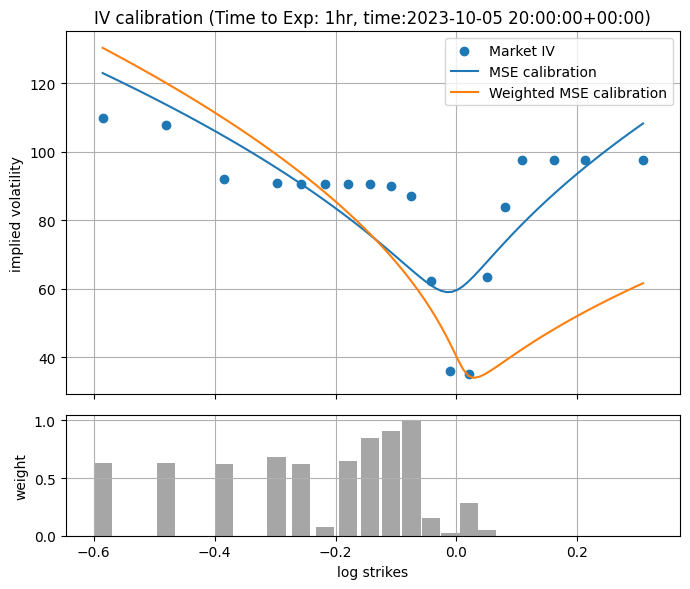

In [65]:
fig, (ax_iv, ax_wt) = plt.subplots(2, 1, sharex=True, 
                                   gridspec_kw={'height_ratios': [3, 1]}, figsize=(7, 6))



# Plot IV smile (top)
ax_iv.scatter(np.log(K/S0), otm_iv, label="Market IV")
us = np.linspace(np.log(K/S0).min(), np.log(K/S0).max(), 100)
ax_iv.plot(us, model.IV_curve([rho, sigma, y0], us), label="MSE calibration", color="tab:blue")
ax_iv.plot(us, model.IV_curve([rho_w, sigma_w, y0_w], us), label="Weighted MSE calibration", color="tab:orange") # If you want to compare
ax_iv.set_ylabel("implied volatility")
ax_iv.legend()
ax_iv.set_title(f"IV calibration (Time to Exp: 1hr, time:{hr_time})")
ax_iv.grid(True)

# Plot weights (bottom)
ax_wt.bar(np.log(K/S0), otm_amount, width=0.03, color='grey', alpha=0.7)
ax_wt.set_ylabel("weight")
ax_wt.set_xlabel("log strikes")
ax_wt.grid(True)

plt.tight_layout()
plt.show()

### TtE = 6 hour

In [28]:
data_short = data[data['TtE'] == pd.Timedelta(hours=6)].reset_index()

K = data_short['strikes'][0]
S0 = data_short['spot'][0]
otm_iv=  data_short['put_ivs'][0]

call_out_filter = K > S0
put_out_filter = K <= S0
otm_amount = np.zeros(len(K))

call_amount = np.array(data_short["call_amounts"][0])
put_amount = np.array(data_short["put_amounts"][0])

otm_amount[call_out_filter] = call_amount[call_out_filter]
otm_amount[put_out_filter] = put_amount[put_out_filter]

# min-max normalization
otm_amount = [(otm_amount[i]-otm_amount.min())/(otm_amount.max()-otm_amount.min()) for i in range(len(otm_amount))]

In [29]:
rho, sigma, y0, res = calibrate_iv_smile(K, S0, otm_iv)
rho_w, sigma_w, y0_w, res_w = weighted_calibrate_iv_smile(K, S0, otm_iv, otm_amount)

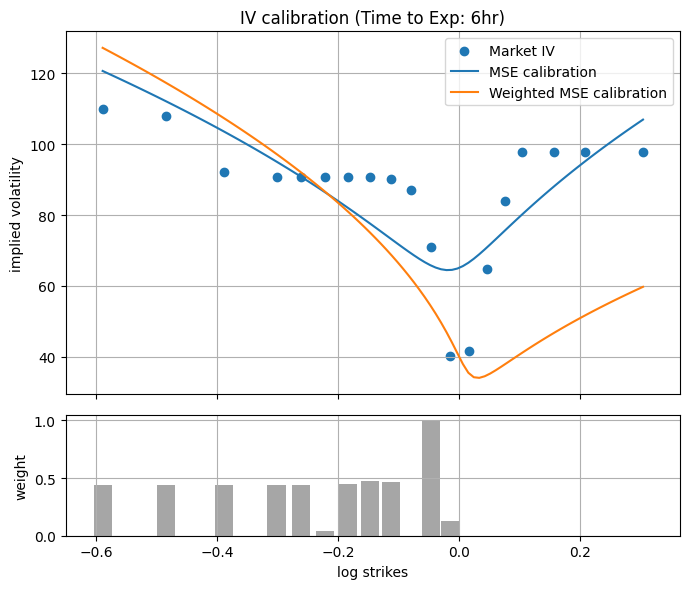

In [30]:
fig, (ax_iv, ax_wt) = plt.subplots(2, 1, sharex=True, 
                                   gridspec_kw={'height_ratios': [3, 1]}, figsize=(7, 6))



# Plot IV smile (top)
ax_iv.scatter(np.log(K/S0), otm_iv, label="Market IV")
us = np.linspace(np.log(K/S0).min(), np.log(K/S0).max(), 100)
ax_iv.plot(us, model.IV_curve([rho, sigma, y0], us), label="MSE calibration", color="tab:blue")
ax_iv.plot(us, model.IV_curve([rho_w, sigma_w, y0_w], us), label="Weighted MSE calibration", color="tab:orange") # If you want to compare
ax_iv.set_ylabel("implied volatility")
ax_iv.legend()
ax_iv.set_title("IV calibration (Time to Exp: 6hr)")
ax_iv.grid(True)

# Plot weights (bottom)
ax_wt.bar(np.log(K/S0), otm_amount, width=0.03, color='grey', alpha=0.7)
ax_wt.set_ylabel("weight")
ax_wt.set_xlabel("log strikes")
ax_wt.grid(True)

plt.tight_layout()
plt.show()

### TtE = 12 hour

In [31]:
data_short = data[data['TtE'] == pd.Timedelta(hours=12)].reset_index()

K = data_short['strikes'][0]
S0 = data_short['spot'][0]
otm_iv=  data_short['put_ivs'][0]

call_out_filter = K > S0
put_out_filter = K <= S0
otm_amount = np.zeros(len(K))

call_amount = np.array(data_short["call_amounts"][0])
put_amount = np.array(data_short["put_amounts"][0])

otm_amount[call_out_filter] = call_amount[call_out_filter]
otm_amount[put_out_filter] = put_amount[put_out_filter]

# min-max normalization
otm_amount = [(otm_amount[i]-otm_amount.min())/(otm_amount.max()-otm_amount.min()) for i in range(len(otm_amount))]

In [32]:
rho, sigma, y0, res = calibrate_iv_smile(K, S0, otm_iv)
rho_w, sigma_w, y0_w, res_w = weighted_calibrate_iv_smile(K, S0, otm_iv, otm_amount)

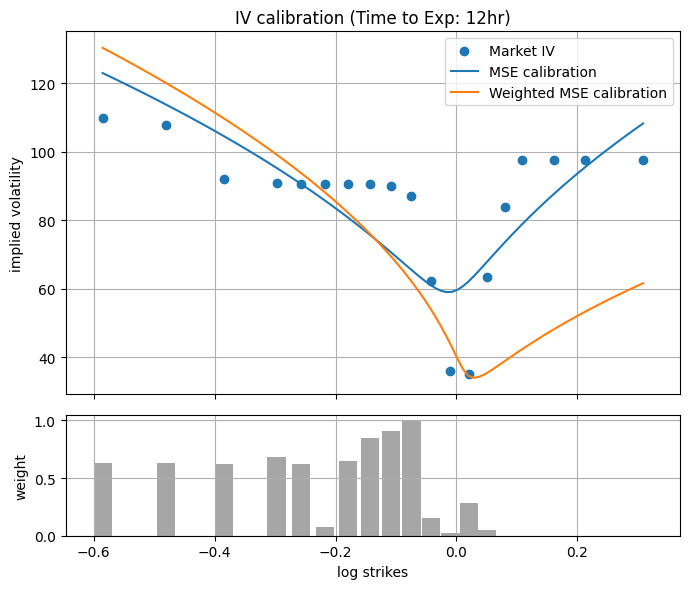

In [33]:
fig, (ax_iv, ax_wt) = plt.subplots(2, 1, sharex=True, 
                                   gridspec_kw={'height_ratios': [3, 1]}, figsize=(7, 6))



# Plot IV smile (top)
ax_iv.scatter(np.log(K/S0), otm_iv, label="Market IV")
us = np.linspace(np.log(K/S0).min(), np.log(K/S0).max(), 100)
ax_iv.plot(us, model.IV_curve([rho, sigma, y0], us), label="MSE calibration", color="tab:blue")
ax_iv.plot(us, model.IV_curve([rho_w, sigma_w, y0_w], us), label="Weighted MSE calibration", color="tab:orange") # If you want to compare
ax_iv.set_ylabel("implied volatility")
ax_iv.legend()
ax_iv.set_title("IV calibration (Time to Exp: 12hr)")
ax_iv.grid(True)

# Plot weights (bottom)
ax_wt.bar(np.log(K/S0), otm_amount, width=0.03, color='grey', alpha=0.7)
ax_wt.set_ylabel("weight")
ax_wt.set_xlabel("log strikes")
ax_wt.grid(True)

plt.tight_layout()
plt.show()